<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/1_2_2_3_Lab_Linear_regression_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab - Linear regression with scikit-learn

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

## The Data

In [2]:
path = 'https://raw.githubusercontent.com/PaulToronto/'
path += 'Stanford-Andrew-Ng-Machine-Learning-Specialization/main/data/'
path += 'houses2.csv'
houses = pd.read_csv(path, header=None)

In [3]:
houses.columns = ['size_sqft', 'bedrooms', 'floors', 'age', 'price']
houses

,size_sqft,bedrooms,floors,age,price
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0
...,...,...,...,...,...
95,1224.0,2.0,2.0,12.0,329.0
96,1432.0,2.0,1.0,43.0,388.0
97,1660.0,3.0,2.0,19.0,390.0
98,1212.0,3.0,1.0,20.0,356.0


In [4]:
X_features = houses.columns[:-1]
X_features = list(X_features)
X_features

['size_sqft', 'bedrooms', 'floors', 'age']

In [5]:
X_train = houses.drop('price', axis=1).values
y_train = houses['price'].values

In [6]:
X_train, y_train

(array([[9.520e+02, 2.000e+00, 1.000e+00, 6.500e+01],
        [1.244e+03, 3.000e+00, 1.000e+00, 6.400e+01],
        [1.947e+03, 3.000e+00, 2.000e+00, 1.700e+01],
        [1.725e+03, 3.000e+00, 2.000e+00, 4.200e+01],
        [1.959e+03, 3.000e+00, 2.000e+00, 1.500e+01],
        [1.314e+03, 2.000e+00, 1.000e+00, 1.400e+01],
        [8.640e+02, 2.000e+00, 1.000e+00, 6.600e+01],
        [1.836e+03, 3.000e+00, 1.000e+00, 1.700e+01],
        [1.026e+03, 3.000e+00, 1.000e+00, 4.300e+01],
        [3.194e+03, 4.000e+00, 2.000e+00, 8.700e+01],
        [7.880e+02, 2.000e+00, 1.000e+00, 8.000e+01],
        [1.200e+03, 2.000e+00, 2.000e+00, 1.700e+01],
        [1.557e+03, 2.000e+00, 1.000e+00, 1.800e+01],
        [1.430e+03, 3.000e+00, 1.000e+00, 2.000e+01],
        [1.220e+03, 2.000e+00, 1.000e+00, 1.500e+01],
        [1.092e+03, 2.000e+00, 1.000e+00, 6.400e+01],
        [8.480e+02, 1.000e+00, 1.000e+00, 1.700e+01],
        [1.682e+03, 3.000e+00, 2.000e+00, 2.300e+01],
        [1.768e+03, 3.000e+0

## Gradient Descent

Scikit-learn has a gradient descent regression model [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html).  Like your previous implementation of gradient descent, this model performs best with normalized inputs. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) will perform z-score normalization as in a previous lab. Here it is referred to as 'standard score'.

## Scale the data

In [7]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray (m,n))     : input data, m examples, n features

    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each feature
    mu = np.mean(X, axis=0)
    # find the standard deviation of each feature
    sigma = np.std(X, axis=0)
    # element-wise, subtract mean for each column and divide by standard deviation
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [8]:
X_norm_test, mu, sigma = zscore_normalize_features(X_train)
X_norm_test[0:5], mu, sigma

(array([[-1.12018542, -1.08793896, -0.78288136,  1.02191098],
        [-0.41174475,  0.44436943, -0.78288136,  0.98312878],
        [ 1.29385043,  0.44436943,  1.27733275, -0.83963464],
        [ 0.75524143,  0.44436943,  1.27733275,  0.12992037],
        [ 1.32296443,  0.44436943,  1.27733275, -0.91719904]]),
 array([1.41371e+03, 2.71000e+00, 1.38000e+00, 3.86500e+01]),
 array([412.17283499,   0.65261014,   0.48538644,  25.78502472]))

In [9]:
# no need to use custom function to scale
# sklearn has an equivalent
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
X_norm[0:5], scaler.mean_, scaler.scale_

(array([[-1.12018542, -1.08793896, -0.78288136,  1.02191098],
        [-0.41174475,  0.44436943, -0.78288136,  0.98312878],
        [ 1.29385043,  0.44436943,  1.27733275, -0.83963464],
        [ 0.75524143,  0.44436943,  1.27733275,  0.12992037],
        [ 1.32296443,  0.44436943,  1.27733275, -0.91719904]]),
 array([1.41371e+03, 2.71000e+00, 1.38000e+00, 3.86500e+01]),
 array([412.17283499,   0.65261014,   0.48538644,  25.78502472]))

In [10]:
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.83735704 6.12923357 2.06021411 3.68430905]


## Create and fit the Regression Model

In [11]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)

SGDRegressor()

In [12]:
sgdr.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [13]:
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

number of iterations completed: 112, number of weight updates: 11201.0


## View parameters

Note that these parameters are associted with the **normalized** input data.

In [14]:
w_norm = sgdr.coef_
w_norm

array([110.00831974, -21.16509218, -32.31463201, -37.88716221])

In [15]:
b_norm = sgdr.intercept_
b_norm

array([362.24838926])

## Make Predictions

In [16]:
# make predictions using `sgdr.predict()`
y_pred_sgdr = sgdr.predict(X_norm)
y_pred_sgdr

array([248.62621768, 295.59848475, 485.71241728, 389.72725772,
       491.85389457, 420.18020567, 223.66980038, 522.6617423 ,
       268.27090532, 683.24909704, 182.81464752, 318.77067103,
       479.15915599, 409.89290052, 393.62239725, 287.46135804,
       323.82890103, 406.16822428, 436.46823463, 270.53813709,
       500.10647285, 329.00484212, 388.28255435, 550.69170439,
       242.2094079 , 296.0367854 , 283.07580605, 218.07711558,
       490.63954252, 229.49377533, 341.85130355, 291.87877341,
       489.85637265, 239.28823855, 597.54102476, 383.87638427,
       452.74623305, 401.31625842, 406.17384693, 173.46542309,
       423.64304905, 434.29181546, 277.53523306, 229.49377533,
       448.33191008, 488.78315592, 332.52297313, 465.41341538,
       222.61345159, 386.80477286, 456.34167701, 370.47335931,
       468.48602651, 310.73026063, 426.58455542, 391.88896253,
       348.11639047, 339.49129812, 471.14751658, 244.092693  ,
       298.88813693, 273.4487189 , 250.53105453, 298.45

In [17]:
# make predictions using w and b
y_pred = X_norm @ w_norm + b_norm
y_pred

array([248.62621768, 295.59848475, 485.71241728, 389.72725772,
       491.85389457, 420.18020567, 223.66980038, 522.6617423 ,
       268.27090532, 683.24909704, 182.81464752, 318.77067103,
       479.15915599, 409.89290052, 393.62239725, 287.46135804,
       323.82890103, 406.16822428, 436.46823463, 270.53813709,
       500.10647285, 329.00484212, 388.28255435, 550.69170439,
       242.2094079 , 296.0367854 , 283.07580605, 218.07711558,
       490.63954252, 229.49377533, 341.85130355, 291.87877341,
       489.85637265, 239.28823855, 597.54102476, 383.87638427,
       452.74623305, 401.31625842, 406.17384693, 173.46542309,
       423.64304905, 434.29181546, 277.53523306, 229.49377533,
       448.33191008, 488.78315592, 332.52297313, 465.41341538,
       222.61345159, 386.80477286, 456.34167701, 370.47335931,
       468.48602651, 310.73026063, 426.58455542, 391.88896253,
       348.11639047, 339.49129812, 471.14751658, 244.092693  ,
       298.88813693, 273.4487189 , 250.53105453, 298.45

In [18]:
(y_pred_sgdr == y_pred).all()

True

In [19]:
# compare a few predictions to the target
y_pred_sgdr[0:5], y_train[0:5]

(array([248.62621768, 295.59848475, 485.71241728, 389.72725772,
        491.85389457]),
 array([271.5, 300. , 509.8, 394. , 540. ]))

## Plot Predictions and Target Values

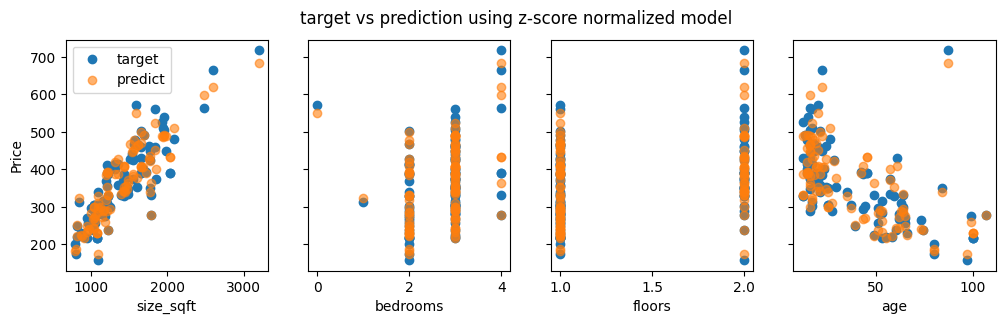

In [20]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label='target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:, i], y_pred, label='predict', alpha=0.6)
ax[0].set_ylabel('Price')
ax[0].legend()
fig.suptitle('target vs prediction using z-score normalized model')

plt.show()